In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
year = int(input('Enter the year: '))
month = int(input('Enter the month from january till september (1-11) if you dont want to filter by month insert, 0: ')) 
title = "Winned matches in the {}th month of the year number {}".format(month,year)


Enter the year: 2017
Enter the month from january till september (1-11) if you dont want to filter by month insert, 0: 9


### Acquisition

In [5]:
def acquire():
    file = "./data/tenis_{}.csv".format(year)
    df = pd.read_csv(file)
    return df 

In [6]:
data = acquire()


In [ ]:
data["tourney_date"] = data.tourney_date.astype("str") # cambio
data["tourney_date"] = data["tourney_date"].str.split(".",expand=True) # cambio
data["tourney_date"].head()

data["tourney_month"] = pd.to_datetime(data["tourney_date"]).dt.month
filtered = data[data["tourney_month"] == month] # Filtro el dataframe por el mes que me interesa
filtered.head()

### Wrangling

In [7]:
def wrangle(data): 
    data = data.dropna(thresh=10)
    #data["tourney_date"] = pd.to_datetime(data.tourney_date.astype("str")) # le doy formato de fecha a tourney date
    #data["tourney_month"] = data["tourney_date"].dt.month # creo una columna con el mes que figura en tourney date
    data["tourney_date"] = data.tourney_date.astype("str") # cambio
    data["tourney_date"] = data["tourney_date"].str.split(".",expand=True) # cambio
    data["tourney_month"] = pd.to_datetime(data["tourney_date"]).dt.month
    if month == 0:
        filtered = data
    else: 
        filtered = data[data["tourney_month"] == month] # Filtro el dataframe por el mes que me interesa
    return filtered
    
wrangle(data).head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,tourney_month
2203,2017-0341,Metz,Hard,32,A,20170918,300,105376,NaN,Q,...,12.0,8.0,75.0,43.0,34.0,9.0,10.0,3.0,6.0,9
2204,2017-0341,Metz,Hard,32,A,20170918,299,105376,NaN,Q,...,3.0,0.0,24.0,15.0,9.0,5.0,5.0,0.0,2.0,9
2205,2017-0341,Metz,Hard,32,A,20170918,298,105332,7.0,NaN,...,1.0,2.0,58.0,39.0,27.0,10.0,10.0,3.0,6.0,9
2206,2017-0341,Metz,Hard,32,A,20170918,297,104999,5.0,NaN,...,4.0,0.0,75.0,59.0,39.0,10.0,12.0,2.0,5.0,9
2207,2017-0341,Metz,Hard,32,A,20170918,296,105376,NaN,Q,...,6.0,1.0,48.0,30.0,21.0,5.0,9.0,2.0,6.0,9


In [8]:
filtered = wrangle(data)


###  Analyze

In [9]:
def analize(filtered):
    grouped = filtered["winner_name"].value_counts().head(5) # cantidad de partidos ganados en el mes 

    """ media de partidos ganados al mes por jugador"""
    monthly_mean = round(data.groupby("winner_name")["winner_name"].count()/(len(set(data['tourney_date']))),1) 
    pd_grouped = (pd.DataFrame(grouped)).reset_index(level=0)
    pd_grouped = pd_grouped.rename(columns={"winner_name":"winned_matches","index":"winner_name"})
    df_mm = pd.DataFrame(monthly_mean)
    df_mm.index.names = ["winner"]
    df_mm = (df_mm.reset_index(level=0))
    df_mm = df_mm.rename(columns={"winner_name":"avg_winned_matches_per_month","winner":"winner_name"})
    df_merge = pd.merge(pd_grouped,df_mm,on="winner_name")
    return df_merge

df_merge = analize(filtered)

In [ ]:
### visualize 

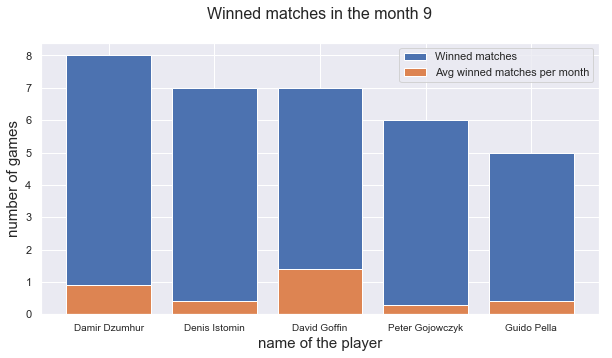

In [19]:
def visualize(df_merge):  
    player = df_merge["winner_name"].head(5)
    winned_matches = df_merge["winned_matches"].head(5)
    avg_winned_matches = df_merge["avg_winned_matches_per_month"].head(10)
    sns.set()
    
    _= fig, ax = plt.subplots(figsize=(10,5))
    _ = plt.bar(player,winned_matches)
    _ = plt.bar(player,avg_winned_matches)
    _ = plt.xlabel("name of the player",fontsize=15)
    _= plt.ylabel("number of games",fontsize=15)
    _= plt.legend(labels=["Winned matches","Avg winned matches per month"])
    _= plt.title("Winned matches in the month {}".format(month) + "\n", fontsize=16)
    plt.xticks(fontsize=10)
    plt.savefig(title + '.png')
    
visualize(df_merge)


In [ ]:
## save the data 